In [46]:
import warnings                                
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from matplotlib import style
import seaborn as sns
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [3]:
sales = pd.read_excel('C:/Users/phani/Downloads/sales_data.xlsx' ,parse_dates=['transaction timestamp'])
time = pd.read_excel('C:/Users/phani/Downloads/date.xlsx',parse_dates=['timestamp'])

In [4]:
sales.head()

,transaction id,product id,product description,quantitysold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
time.head()

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [6]:
sales['Date'] = pd.to_datetime(sales['transaction timestamp'].dt.date)


In [7]:
sales.head()

,transaction id,product id,product description,quantitysold,transaction timestamp,unit price,customer id,transaction country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [8]:
sales.columns

Index(['transaction id', 'product id', 'product description', 'quantitysold',
       'transaction timestamp', 'unit price', 'customer id',
       'transaction country', 'Date'],
      dtype='object')

In [9]:
sales['total']=sales['unit price'] *sales['quantitysold']
sales['total'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: total, dtype: float64

In [10]:
sales .head()

,transaction id,product id,product description,quantitysold,transaction timestamp,unit price,customer id,transaction country,Date,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [11]:
graph=pd.DataFrame(sales.Date)
#graph.Dates=pd.to_datetime(graph.Dates)
graph['sales']=sales.total
graph.head()

,Date,sales
0,2010-12-01,15.30
1,2010-12-01,20.34
2,2010-12-01,22.00
3,2010-12-01,20.34
4,2010-12-01,20.34


In [12]:
k= graph.Date.dt.to_period('M')
g = graph.groupby(k)
g
final = g.sum().reset_index()


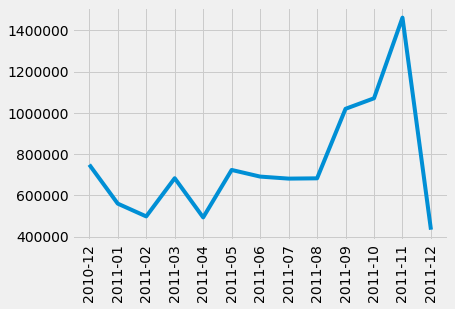

In [47]:
style.use('fivethirtyeight')
x=final.Date.astype('str')
y=final.sales
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()

In [14]:
r=sales[pd.to_numeric(sales['transaction id'],errors='coerce').notnull()]
r['transaction id'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
580367     650
580115     645
581439     635
580983     629
578344     622
538349     620
578347     606
537638     601
537237     597
576617     593
536876     593
536592     592
537823     591
576837     585
579508     578
577078     572
537240     568
577358     561
576618     552
576840     544
          ... 
568053       1
568079       1
568080       1
568081       1
544438       1
562278       1
575433       1
561498       1
568084       1
575415       1
561499       1
544443       1
544430       1
560032       1
544396       1
575518       1
552717       1
552716       1
575513       1
567951       1
575506       1
575505       1
544426       1
575503       1
544407       1
562279       1
544410       1
575497       1
544423       1
558366       1
Name: transaction id, Length: 22061, dtype: int64

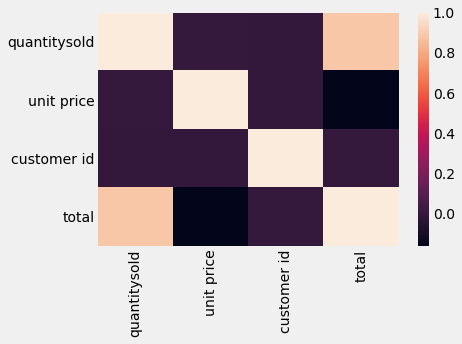

In [48]:
sns.heatmap(sales.corr())

In [16]:
indexed_df = sales.set_index('Date')
ts_sale = indexed_df['total']
ts_sale.head(5)

Date
2010-12-01    15.30
2010-12-01    20.34
2010-12-01    22.00
2010-12-01    20.34
2010-12-01    20.34
Name: total, dtype: float64

In [17]:
ts_sale_week = ts_sale.resample('W').mean()
ts_sale_week.head()

Date
2010-12-05    17.926582
2010-12-12    16.294130
2010-12-19    18.576366
2010-12-26    19.502622
2011-01-02          NaN
Freq: W-SUN, Name: total, dtype: float64

In [18]:
ts_sale_total=ts_sale_week.dropna()
ts_sale_total

Date
2010-12-05    17.926582
2010-12-12    16.294130
2010-12-19    18.576366
2010-12-26    19.502622
2011-01-09    12.219156
2011-01-16    21.605765
2011-01-23    14.239799
2011-01-30    15.406286
2011-02-06    17.678321
2011-02-13    17.840413
2011-02-20    19.751744
2011-02-27    17.326814
2011-03-06    17.690975
2011-03-13    17.281734
2011-03-20    17.751755
2011-03-27    17.460725
2011-04-03    20.445873
2011-04-10    15.295374
2011-04-17    19.603798
2011-04-24    14.343012
2011-05-01    17.384149
2011-05-08    16.284111
2011-05-15    20.039527
2011-05-22    20.738457
2011-05-29    21.435031
2011-06-05    17.338749
2011-06-12    18.779488
2011-06-19    21.805486
2011-06-26    14.115336
2011-07-03    19.948396
2011-07-10    16.464854
2011-07-17    13.922760
2011-07-24    18.413434
2011-07-31    21.395675
2011-08-07    19.233576
2011-08-14    21.105782
2011-08-21    24.199134
2011-08-28    18.522162
2011-09-04    14.881939
2011-09-11    18.573995
2011-09-18    20.237299
2011-09-25 

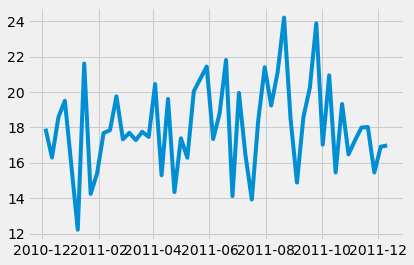

In [49]:
plt.plot(ts_sale_total.index.to_pydatetime(),ts_sale_total.values )
plt.savefig('over view of data of sales ')

In [38]:
def check_stationarity(timeseries):
    
    #Determing rolling statistics
    rolling_mean = timeseries.rolling(window=12,center=False).mean() 
    rolling_std = timeseries.rolling(window=24,center=False).std()

    #Plot rolling statistics:
    original = plt.plot(timeseries.index.to_pydatetime(), timeseries.values, color='blue',label='Original')
    mean = plt.plot(rolling_mean.index.to_pydatetime(), rolling_mean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std.index.to_pydatetime(), rolling_std.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    plt.savefig('check_stationarity ')
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dickey_fuller_test = adfuller(timeseries, autolag='AIC')
    dfresults = pd.Series(dickey_fuller_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dickey_fuller_test[4].items():
        dfresults['Critical Value (%s)'%key] = value
    print (dfresults)

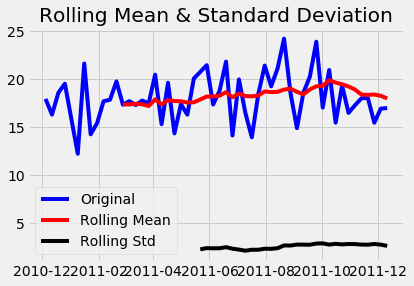

Results of Dickey-Fuller Test:
Test Statistic                -7.768888e+00
p-value                        9.032017e-12
#Lags Used                     0.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


In [50]:
check_stationarity(ts_sale_total)


In [40]:
ts_sale_total_log = np.log(ts_sale_total)

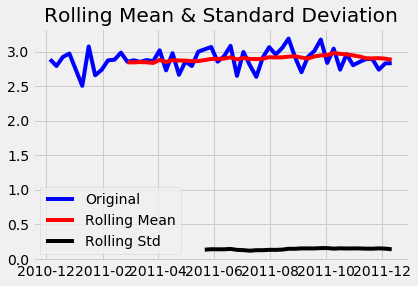

Results of Dickey-Fuller Test:
Test Statistic                -8.023909e+00
p-value                        2.041471e-12
#Lags Used                     0.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


In [51]:
check_stationarity(ts_sale_total_log)

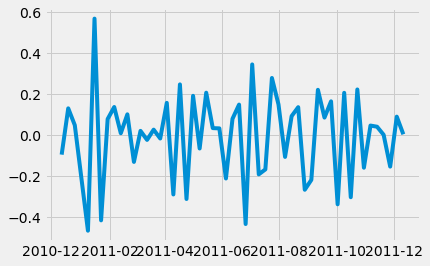

In [52]:
ts_sale_total_log_diff = ts_sale_total_log - ts_sale_total_log.shift()
plt.plot(ts_sale_total_log_diff.index.to_pydatetime(), ts_sale_total_log_diff.values)

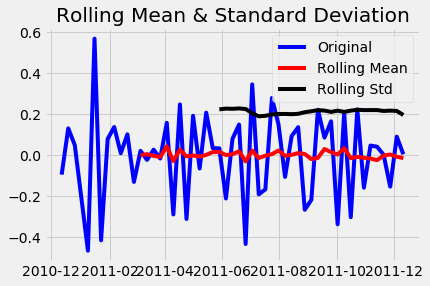

Results of Dickey-Fuller Test:
Test Statistic                 -5.157507
p-value                         0.000011
#Lags Used                      5.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [53]:
ts_sale_total_log_diff.dropna(inplace=True)
check_stationarity(ts_sale_total_log_diff)

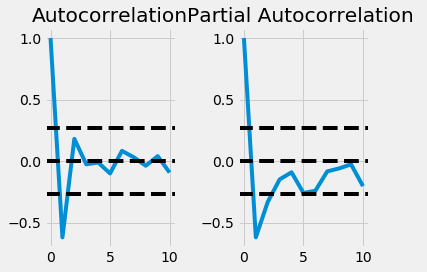

In [61]:
#ACF and PACF plots

lag_auto_corr = acf(ts_sale_total_log_diff, nlags=10)
lag_par_auto_corr = pacf(ts_sale_total_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_sale_total_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts_sale_total_log_diff)),linestyle='--',color='black')
plt.title('Autocorrelation')


print('\n')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_par_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(ts_sale_total_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts_sale_total_log_diff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation ')
plt.tight_layout()

In [62]:
model = ARIMA(ts_sale_total_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

Text(0.5,1,'RSS: 1.2625')

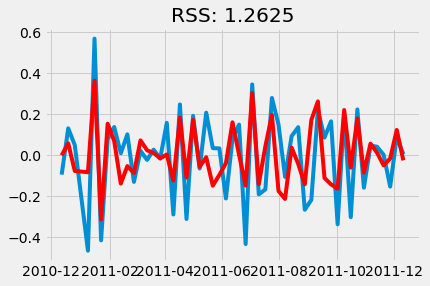

In [63]:
#MA model:
model = ARIMA(ts_sale_total_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_sale_total_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_sale_total_log_diff)**2))

Text(0.5,1,'RSS: 1.0625')

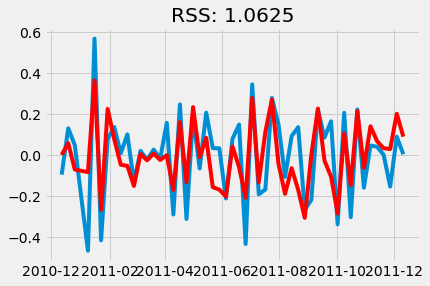

In [64]:

model = ARIMA(ts_sale_total_log, order=(1, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_sale_total_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_sale_total_log_diff)**2))

Text(0.5,1,'RSS: 1.0537')

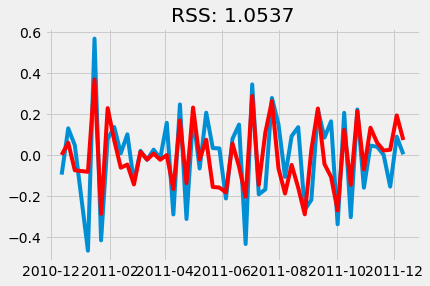

In [65]:
model = ARIMA(ts_sale_total_log, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_sale_total_log_diff.index.to_pydatetime(), ts_sale_total_log_diff.values)
plt.plot(ts_sale_total_log_diff.index.to_pydatetime(), results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_sale_total_log_diff)**2))

                             ARIMA Model Results                              
Dep. Variable:                D.total   No. Observations:                   52
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  27.566
Method:                       css-mle   S.D. of innovations              0.137
Date:                Mon, 17 Dec 2018   AIC                            -45.132
Time:                        16:14:24   BIC                            -35.375
Sample:                    12-12-2010   HQIC                           -41.391
                         - 12-11-2011                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.001      0.872      0.387      -0.001       0.004
ar.L1.D.total    -0.1063      0.139     -0.766      0.448      -0.378       0.166
ar.L2.D.total     0.1275      0.139     

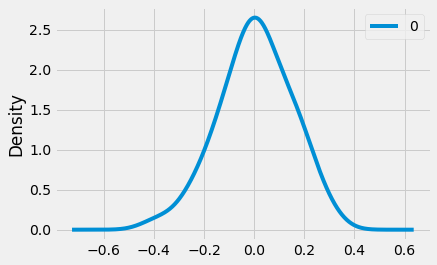

In [66]:
print(results_ARIMA.summary())
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())

In [67]:
sale_predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (sale_predictions_ARIMA_diff.head())

Date
2010-12-12    0.001089
2010-12-19    0.060661
2010-12-26   -0.074149
2011-01-09   -0.081665
2011-01-16    0.370082
dtype: float64


In [68]:
sale_predictions_ARIMA_diff_cumsum = sale_predictions_ARIMA_diff.cumsum()
sale_predictions_ARIMA_log = pd.Series(ts_sale_total_log.iloc[0], index=ts_sale_total_log.index)
sale_predictions_ARIMA_log = sale_predictions_ARIMA_log.add(sale_predictions_ARIMA_diff_cumsum,fill_value=0)

Text(0.5,1,'RMSE: 6.1195')

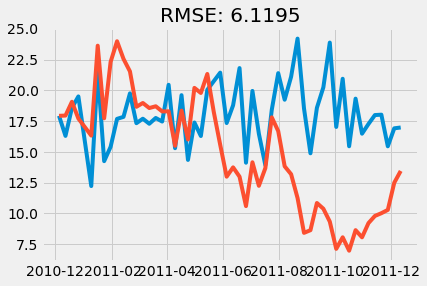

In [69]:
sale_predictions_ARIMA = np.exp(sale_predictions_ARIMA_log)
plt.plot(ts_sale_total.index.to_pydatetime(), ts_sale_total.values)
plt.plot(ts_sale_total.index.to_pydatetime(), sale_predictions_ARIMA.values)
plt.title('RMSE: %.4f'% np.sqrt(sum((sale_predictions_ARIMA-ts_sale_total)**2)/len(ts_sale_total)))

In [70]:
size = int(len(ts_sale_total_log) - 15)
train, test = ts_sale_total_log[0:size], ts_sale_total_log[size:len(ts_sale_total_log)]
historical = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(historical, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    observed = test[t]
    historical.append(observed)
    print('Predicted sales Rate = %f, Expected sale Rate = %f' % (np.exp(yhat), np.exp(observed)))

error = mean_squared_error(test, predictions)

print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)

sale_predictions_series = pd.Series(predictions, index = test.index)

Printing Predicted vs Expected Values...


Predicted sales Rate = 22.733437, Expected sale Rate = 14.881939
Predicted sales Rate = 20.128664, Expected sale Rate = 18.573995
Predicted sales Rate = 18.962473, Expected sale Rate = 20.237299
Predicted sales Rate = 18.897307, Expected sale Rate = 23.876773
Predicted sales Rate = 18.805042, Expected sale Rate = 17.022567
Predicted sales Rate = 19.969888, Expected sale Rate = 20.936291
Predicted sales Rate = 19.336094, Expected sale Rate = 15.452504
Predicted sales Rate = 20.426039, Expected sale Rate = 19.320409
Predicted sales Rate = 19.241954, Expected sale Rate = 16.473988
Predicted sales Rate = 19.795029, Expected sale Rate = 17.262517
Predicted sales Rate = 19.190383, Expected sale Rate = 17.987239
Predicted sales Rate = 19.012948, Expected sale Rate = 18.018547
Predicted sales Rate = 19.020994, Expected sale Rate = 15.447871
Predicted sales Rate = 19.196614, Expected sale Rate = 16.910287
Predicted sales Rate = 18.397266, Expected sale

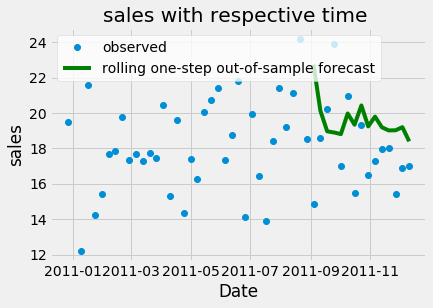

In [71]:
fig, ax = plt.subplots()
ax.set(title='sales with respective time ', xlabel='Date', ylabel='sales')
ax.plot(ts_sale_total[-50:], 'o', label='observed')
ax.plot(np.exp(sale_predictions_series), 'g', label='rolling one-step out-of-sample forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

In [ ]:
"""
hence the p value is nearer to 0 and we hav mse value nearer 0  the predictions are  right
as from the graphs we can say the  sales are maximum in end of the year  
and  we see the p value is gave vast change after dropping seasonality  it shows us
the products are seasonal  products last three months of the year( i.e 10,11,12 of every year)
 the predicted sale rate and expected sale rate having less by 0.028 times  
"""

In [76]:
sales['total'].corr(sales['quantitysold'])

0.8866810911791425